In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from smartpath import *
from smartpath_qpscope import *

In [4]:
sp = smartpath(core)
qp = smartpath_qpscope()

In [5]:
p = sp.get_current_position(core)
#core.set_position(p.z+50)
p

sp_position(x=19303.1, y=14511.7, z=-10508.7)

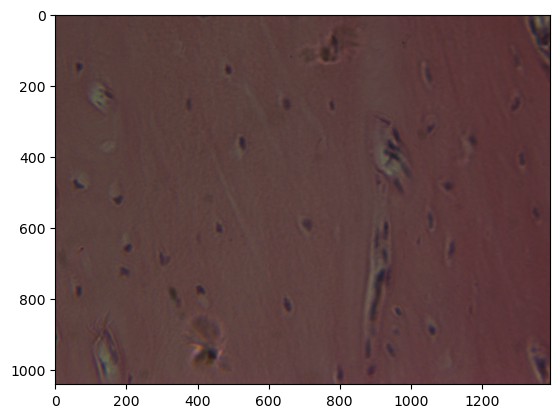

In [6]:
img, tag = sp.snap(core)
plt.imshow(img)

-10502.748076152306

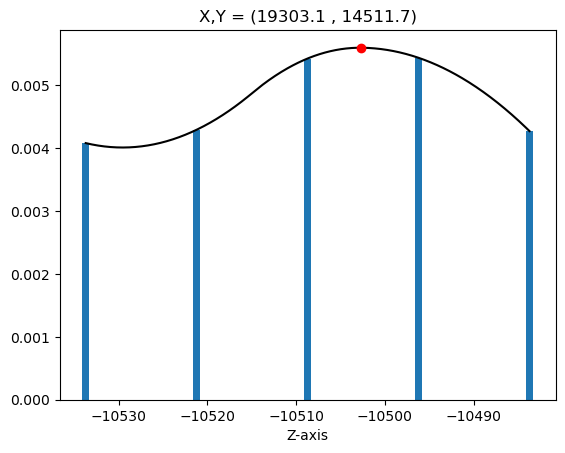

In [7]:
sp.autofocus(core,camm,pop_a_plot=True,search_range=50)

In [8]:
#plt.imshow(sp.white_balance(img))

In [11]:
#camm_.CAMM_20X_BF, camm_.lens_20x

In [12]:
smartpath.obj_2_list(core.get_allowed_property_values(*camm.obj_slider))

['Position-1', 'Position-2']

In [14]:
core.get_property(*camm.obj_slider) ## is on 20x

'Position-1'

In [15]:
camm.objective_lens = {"4x":'Position-2', "20x":'Position-1'}

In [88]:
camm.objective_lens['4x']

'Position-2'

In [16]:
#loci_instrument_profiles= loci_instruments()

## create a dummy tileconfig

In [44]:
import uuid
import pathlib

class qpscope_project:
    def __init__(self, 
                    projectsFolderPath :str = r"C:\Users\lociuser\Codes\MikeN\data\slides",
                    sampleLabel :str = "First_Test",
                    scan_type:str  = "4x_bf_1",
                    region:str  = "2447_1631",
                    tile_config :str =  "TileConfiguration.txt"):                                        
                    self.path_tile_configuration  = pathlib.Path(projectsFolderPath, sampleLabel, scan_type, region,tile_config)
                    if self.path_tile_configuration.exists():
                        self.path_qp_project = pathlib.Path(projectsFolderPath, sampleLabel)
                        self.path_output = pathlib.Path(projectsFolderPath, sampleLabel, scan_type,region)  # "data/acquisition"
                        self.acq_id = sampleLabel + "_ST_"+ scan_type
                    else:
                        self.path_qp_project = "undefined"
                        self.path_output = "undefined"
                        self.acq_id = "undefined" + "_ScanType_"+ "undefined"
    @staticmethod
    def uid():
        return uuid.uuid1().urn[9:]

    def __repr__(self):
        return f"qupath project :{self.path_qp_project} \n tif files : {self.path_output} \n acq_id:{self.acq_id}"
        

### make tileconfig file

In [18]:
q= qpscope_project()
q.path_tile_configuration

WindowsPath('C:/Users/lociuser/Codes/MikeN/data/slides/First_Test/4x_bf_1/2447_1631/TileConfiguration.txt')

In [20]:
camm.imaging_mode = camm_.CAMM_20X_BF

In [23]:
qp = smartpath_qpscope()

In [24]:
positions = qp.get_dummy_coordinates(3,3,sp.get_current_position(core),camm)
positions

array([[19303.16 , 14511.71 ],
       [19303.16 , 14742.59 ],
       [19303.16 , 14973.47 ],
       [19612.184, 14511.71 ],
       [19612.184, 14742.59 ],
       [19612.184, 14973.47 ],
       [19921.208, 14511.71 ],
       [19921.208, 14742.59 ],
       [19921.208, 14973.47 ]])

In [26]:
qp.write_tileconfig(q.path_tile_configuration,positions=positions)

### reload qpscope

In [49]:
q = qpscope_project( projectsFolderPath  = r"C:\Users\lociuser\Codes\MikeN\data\slides",
                        sampleLabel      = "First_Test",
                        scan_type        = "4x_bf_1",
                        region           = "2447_1631",
                        tile_config      = "TileConfiguration.txt"
                      )

In [50]:
q.acq_id

'First_Test_ST_4x_bf_1'

In [51]:
q.acq_id = q.acq_id.replace('4x','20x')

In [31]:
qp.write_tileconfig(q.path_tile_configuration,positions=positions,id1 = q.acq_id)

### check autofocus locations

In [32]:
af_position_indices = qp.get_autofocus_positions(positions,camm,1.35)
af_position_indices

5 [0, 5] [19612.184 14973.47 ] 555.62
6 [0, 5, 6] [19921.208 14511.71 ] 555.62


([0, 5, 6], 520.759603093174)

5 [0, 5] [19612.184 14973.47 ] 555.62
6 [0, 5, 6] [19921.208 14511.71 ] 555.62


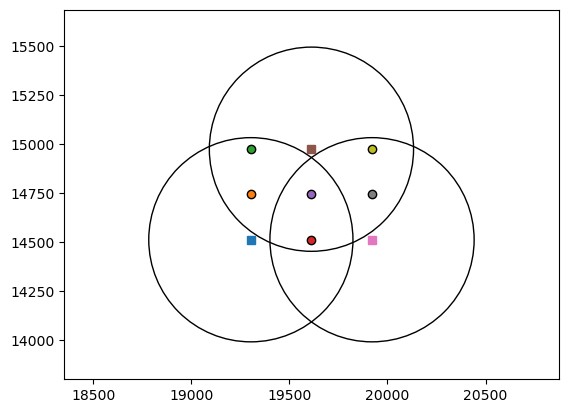

In [34]:
qp.visualize_autofocus_locations(positions,camm)

### read tile config

In [52]:
tile_config_path = q.path_tile_configuration
coordinates = qp.read_TileConfiguration_coordinates(tile_config_path)

In [53]:
coordinates

array([[19303.16 , 14511.71 ],
       [19303.16 , 14742.59 ],
       [19303.16 , 14973.47 ],
       [19612.184, 14511.71 ],
       [19612.184, 14742.59 ],
       [19612.184, 14973.47 ],
       [19921.208, 14511.71 ],
       [19921.208, 14742.59 ],
       [19921.208, 14973.47 ]])

In [54]:
movement_range = max([v[1] for v in qp.get_distance_sorted_xy_dict(coordinates).values()])
movement_range

771.5

In [55]:
camm.imaging_mode = camm_.CAMM_20X_BF
camm.imaging_mode.pixelsize =  core.get_pixel_size_um()

In [56]:
pixel_size =  camm.imaging_mode.pixelsize
ums_pixel = 1/pixel_size

In [61]:
qp = smartpath_qpscope()

In [65]:
autofocus_indices, range = af_position_indices

In [68]:
f"Autofocus Range {range:.1f} and Full movement Range {movement_range:.1f}"

'Autofocus Range 520.8 and Full movement Range 771.5'

In [69]:
qp.scan_using_positions(sp,
                        camm,
                        save_folder=q.path_output,
                        positions= positions,
                        id1 =q.acq_id,
                        core=core,
                        autofocus_indices=autofocus_indices)

sp_position(x=19612.2, y=14742.6, z=None)

In [77]:
sp.move_to_position(core,sp_position(*positions[0]),camm)

In [80]:
camm.imaging_mode

sp_camm_imaging_mode(name='20x BrightField', pixelsize=0.2201, z=-6980, f=-15800)

In [81]:
qp.write_tileconfig(q.path_tile_configuration,positions=positions,id1=q.acq_id,pixel_size=camm.imaging_mode.pixelsize)

In [83]:
camm_.CAMM_4X_BF

sp_camm_imaging_mode(name='4x BrightField', pixelsize=1.105, z=3570, f=-1000)

In [84]:
camm_.CAMM_20X_BF

sp_camm_imaging_mode(name='20x BrightField', pixelsize=0.222, z=-6980, f=-15800)

In [86]:
#Z
3570+6980

10550

In [85]:
camm_.CAMM_20X_BF.z = -10502
camm_.CAMM_20X_BF.f = -13350

In [87]:
camm.safe_z = 0

In [90]:
core.set_property(*camm.obj_slider,camm.objective_lens['4x'])

In [92]:
camm_.CAMM_4X_BF.f = -3200
camm_.CAMM_4X_BF.z = -9.2

In [93]:
camm

sp_camm_settings(stage=sp_camm_stage(xlimit=_limits(low=0, high=40000.0), ylimit=_limits(low=0, high=30000.0), zlimit=_limits(low=-10600.0, high=0), z_stage='ZStage:Z:32', f_stage='ZStage:F:32', flimit=_limits(low=-18000.0, high=0)), lens=sp_objective_lens(name='4x', magnification=4, NA=0.2, WD=20, description='CFI Plan Apochromat Lambda D 4X', manufacturer_id='MRD70040'), detector=sp_detector(width=1392, height=1040), imaging_mode=sp_camm_imaging_mode(name='20x BrightField', pixelsize=0.2201, z=-6980, f=-15800), lamp=('LED-Dev1ao0', 'Voltage'), obj_slider=('Turret:O:35', 'Label'), slide_size=(40000.0, 20000.0), CAMM_20X_BF_XYoffset=(-600, 10), CAMM_20X_MPM_XYoffset=(-580, -280), CAMM_4X_BF_lampintensity=4, CAMM_20X_BF_lampintensity=5)

In [94]:
img,tag= sp.snap(core)

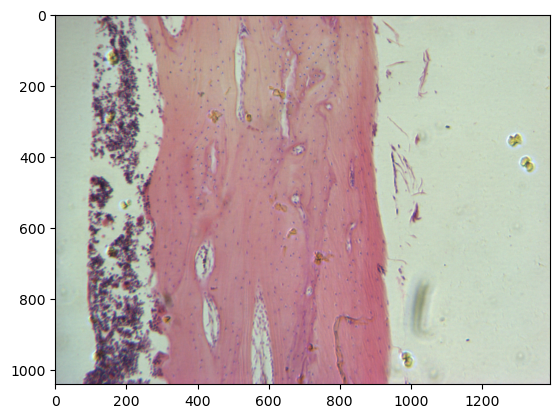

In [95]:
plt.imshow(img)

In [97]:
camm.imaging_mode=camm_.CAMM_4X_BF

In [99]:
sp.get_current_position(core)

sp_position(x=19303.2, y=16101.1, z=34.5)

In [102]:
camm_.stage_ASI.zlimit.high= 100
camm_.stage_ASI.zlimit

_limits(low=-10600.0, high=100)

17.110280561122245

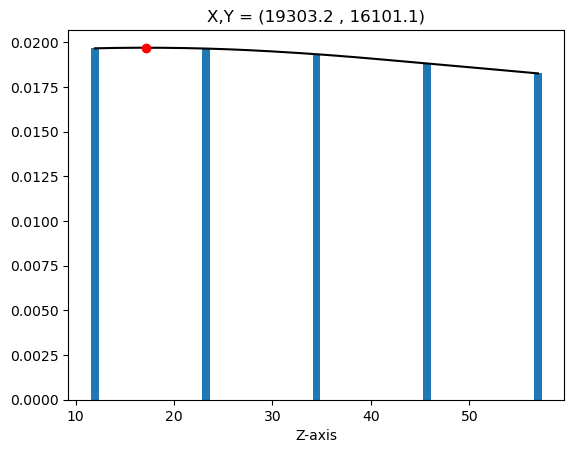

In [103]:
sp.autofocus(core,camm,pop_a_plot=True)

In [ ]:

if len(sys.argv) == 5:
    self_filename, projectsFolderPath, sampleLabel, scan_type, region = sys.argv
else:
    warnings.warn("Missing Input parameters",RuntimeWarning)
    self_filename = r"C:\Users\lociuser\Codes\smart-wsi-scanner\minimal_qupathrunner.py"
    projectsFolderPath = r"C:\Users\lociuser\Codes\MikeN\data\slides"
    sampleLabel = "First_Test3"
    scan_type = "4x_bf_1"
    region = "bounds"  
    # or a centroid from the qupath annotation. eg "2012-2323"
    # TODO may change to universal centroid_index naming



projectsFolderPath , sampleLabel, scan_type, region



core.set_auto_shutter(False)
core.set_shutter_open(True)

if debug_mode > 0:
    print("QuPath: Starting Acquisition")
if coordinates_within_limits:
    results_4x = sp_acq.whole_slide_bf_scan(
        save_path,
        acq_name,
        coordinates,
        mag="4x",
        focus_dive=True,
        estimate_background=False,
    )
    core.set_auto_shutter(True)
    acq_id = len(glob.glob(os.path.join(save_path, acq_name + "*")))
    acq_path = os.path.join(save_path, acq_name + "_{}".format(acq_id))
    if debug_mode > 0:
        print(f"QuPath: Saved files to {acq_path}")

    position_list = coordinates
    if position_list.ndim == 3:
        p1, p2, p3 = position_list.shape
        position_list = np.reshape(position_list, [p1 * p2, p3])

    pixel_size = config["pixel-size-bf-4x"]

    # mage_list = glob.glob(os.path.join(acq_path, "*.tif"))
    image_list = sorted(
        glob.glob(os.path.join(acq_path, "*.tif")),
        key=lambda x: int(os.path.basename(x).split("-")[0]),
    )


    #    assert len(position_list) == len( image_list ), "Number of images does not match number of positions"

    with open(
        os.path.join(stitchfolder_path, "TileConfiguration.txt"), "w"
    ) as text_file:
        print("dim = {}".format(2), file=text_file)
        for pos in range(position_list.shape[0]):
            x = float(position_list[pos][0])  # int(position_list[pos][0] / pixel_size)
            y = float(position_list[pos][1])  # int(position_list[pos][1] / pixel_size)
            print("{}.tif; ; ({}, {})".format(pos, x, y), file=text_file)

    if debug_mode > 0:
        print(f"QuPath: Saved new TileConfiguration.txt to {stitchfolder_path}")
        print(f"QuPath: tif-files in acq folder :{len(image_list)}")
        if debug_mode > 1:
            print(f"QuPath: Image List     :{image_list}   ")
            # print(f"QuPath: Position List  :{position_list}")

    for pos in range(len(image_list)):

        fn = image_list[pos]
        img = io.imread(fn)

        correction = False
        rotate = False
        flip_y = True
        flip_x = False

        # if correction is True and background_image is not None:
        #    img = white_balance(img, background_image)
        #    img = flat_field(img, bg_img)

        if rotate is not None:
            img = transform.rotate(img, rotate)

        if flip_y:
            img = img[::-1, :]

        if flip_x:
            img = img[:, ::-1]

        if debug_mode > 1:
            print(f"QuPath: Moving {pos}.tif to {stitchfolder_path}")

        save_filename = os.path.join(stitchfolder_path, f"{pos}.tif")

        # TODO: replace scikit iosave with tifffile with metadata
        io.imsave(
            save_filename,
            img_as_uint(img),
            check_contrast=False,
        )
        if debug_mode > 1:
            print(f"QuPath: Saved: {save_filename}")

    qupath_stitching_folder = os.path.join(
        projectsFolderPath, sampleLabel, scan_type, region
    )
    if debug_mode > 0:
        print("QuPath: Stripping Metadata For stitching ")
        print(
            f"QuPath: copying from \n{stitchfolder_path} \t to \n{qupath_stitching_folder}"
        )

    shutil.copytree(stitchfolder_path, qupath_stitching_folder, dirs_exist_ok=True)

    shutil.rmtree(stitchfolder_path)
    if debug_mode > 0:
        print(f"QuPath: Finished saving tiles for stitching at {stitchfolder_path}")
    os.chdir(cwd)

core._close()
studio._close()
del studio
del core
if debug_mode > 0:
    print("QuPath: Pycromanager Acquisition Task Completed")
